### More on NumPy arrays

### Multidimensional Aggregations

These perform aggregation operations along rows or columns.

Aggregation functions include an axis argument to specify along which axis to compute the aggregate.

The axis key word specifies the dimension of the array that will be collapsed - 

specifying zero means the first axis will be collapsed.



In [1]:
import numpy as np

If axis is None (the default), the array is treated as a 1-D array and the operation is performed over the entire array. 

In [2]:
M=np.random.random((3,4))
M


array([[0.30084305, 0.85624616, 0.54675784, 0.04562423],
       [0.35608116, 0.53363609, 0.36526259, 0.41671897],
       [0.86247536, 0.81287412, 0.82835798, 0.23906181]])

In [3]:
M.sum() # by default aggregation is over the entire array

6.163939361906818

In [4]:
M.mean()

0.5136616134922348

In [5]:
M.sum(axis=0) #performs summation over the columns

array([1.51939957, 2.20275637, 1.74037841, 0.70140501])

In [6]:
M.sum(axis=1) #performs summation over the rows

array([1.74947128, 1.67169881, 2.74276927])

In [7]:
M.max(0) # get the max within each column

array([0.86247536, 0.85624616, 0.82835798, 0.41671897])

In [8]:
M.max(1)# get the max within each row

array([0.85624616, 0.53363609, 0.86247536])

In [9]:
a2=np.arange(27).reshape([3,3,3])
a2

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [11]:
a2.sum(axis=0)

array([[27, 30, 33],
       [36, 39, 42],
       [45, 48, 51]])

In [12]:
a2.sum(axis=1)

array([[ 9, 12, 15],
       [36, 39, 42],
       [63, 66, 69]])

In [13]:
a2.sum(axis=2)

array([[ 3, 12, 21],
       [30, 39, 48],
       [57, 66, 75]])

In [14]:
a2.max(0)

array([[18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

In [15]:
a2.max(1)

array([[ 6,  7,  8],
       [15, 16, 17],
       [24, 25, 26]])

In [16]:
a2.max(2)

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

### Broadcasting 

rules for applying binary ufuncs on arrays of different sizes

In [17]:
import numpy as np

In [18]:
a=np.array([0,1,2])
b=np.array([5,5,5])
a+b

array([5, 6, 7])

We can think of the operation as stretching the scalar 5 to [5,5,5] in order to carry out the addition

In [19]:
a+5

array([5, 6, 7])

In [20]:
M=np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [21]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

 In this example the 1 dimsional array is stretched or broadcast to match the 3d array.

In [23]:
a=np.arange(3)
b=np.arange(3).reshape(3,1)
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [24]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

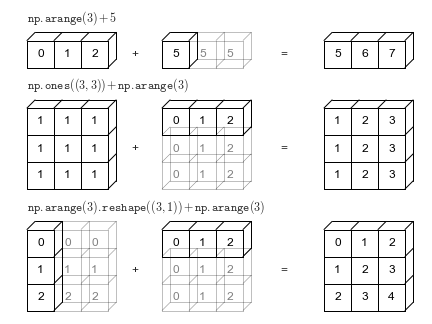

### Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.


- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.


- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [25]:
M = np.ones((2, 3))
a = np.arange(3)
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


The shape of the arrays are

M.shape = (2, 3)
a.shape = (3,)

By rule 1 the array a has fewer dimensions, so we pad it on the left with ones:

M.shape -> (2, 3)
a.shape -> (1, 3)

By rule 2,  the first dimension disagrees, so we stretch this dimension to match:

M.shape -> (2, 3)
a.shape -> (2, 3)

In [26]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [29]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


start by considering the shape of the arrays:

a.shape = (3, 1)
b.shape = (3,)

Rule 1 says we must pad the shape of b with ones:

a.shape -> (3, 1)
b.shape -> (1, 3)

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

a.shape -> (3, 3)
b.shape -> (3, 3)

In [30]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [31]:
M = np.ones((3, 2))
a = np.arange(3)
print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


The shape of the arrays are

M.shape = (3, 2)
a.shape = (3,)

Again, rule 1 tells us that we must pad the shape of a with ones:

M.shape -> (3, 2)
a.shape -> (1, 3)

By rule 2, the first dimension of a is stretched to match that of M:

M.shape -> (3, 2)
a.shape -> (3, 3)

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [32]:
M+a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## Uses of Bradcasting:

efficiency gains: NumPy ufuncs remove the need for slow Python loops.

Broadcasting extends this ability. 

One common example is centering an array of data. 

Assume you have an array of 10 observations, each of which consists of 3 values. 

Centering can be easily done through broadcasting

In [61]:
X = np.random.random((10, 3))
X

array([[0.47966317, 0.97427319, 0.62480755],
       [0.68759715, 0.70875702, 0.65415501],
       [0.34588611, 0.73991643, 0.41205569],
       [0.64292105, 0.97694115, 0.44780078],
       [0.057383  , 0.75813214, 0.07013638],
       [0.19881075, 0.03835458, 0.4442189 ],
       [0.1196364 , 0.32435586, 0.14563159],
       [0.88306004, 0.24620854, 0.21407515],
       [0.08690289, 0.12683899, 0.60712314],
       [0.08674351, 0.63801816, 0.67300135]])

We can compute the mean of each feature using the mean aggregate across the first dimension:

In [64]:
Xmean = X.mean(0)
Xmean

array([0.35886041, 0.55317961, 0.42930055])

In [65]:
X_centered = X - Xmean # example broadcasting
X_centered

array([[ 0.12080276,  0.42109358,  0.195507  ],
       [ 0.32873674,  0.15557741,  0.22485445],
       [-0.01297429,  0.18673682, -0.01724487],
       [ 0.28406064,  0.42376155,  0.01850023],
       [-0.3014774 ,  0.20495253, -0.35916417],
       [-0.16004965, -0.51482503,  0.01491835],
       [-0.23922401, -0.22882374, -0.28366897],
       [ 0.52419963, -0.30697106, -0.21522541],
       [-0.27195752, -0.42634061,  0.17782258],
       [-0.27211689,  0.08483856,  0.2437008 ]])

The shape of the arrays are

X.shape = (10, 3) Xmean.shape = (3,)

Rule 1 says we must pad the shape of Xmean with ones:

X.shape -> (10, 3) Xmean.shape -> (1, 3)

rule 2 says we upgrade each of these ones to match the corresponding size of the other array:

X.shape -> (10, 3) Xmean.shape -> (10, 3)

In [66]:
X_centered.mean(0)

array([ 1.22124533e-16, -6.66133815e-17, -2.22044605e-17])

In [67]:
X_centered.mean(0).sum()

3.330669073875471e-17

Broadcasting can be useful is in displaying images based on two-dimensional functions. 

If we want to define a function z=f(x,y), broadcasting can be used to compute the function across a grid.

In [75]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5,)
y = np.linspace(0, 5)[:, np.newaxis]


In [76]:
x

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [77]:
y

array([[0.        ],
       [0.10204082],
       [0.20408163],
       [0.30612245],
       [0.40816327],
       [0.51020408],
       [0.6122449 ],
       [0.71428571],
       [0.81632653],
       [0.91836735],
       [1.02040816],
       [1.12244898],
       [1.2244898 ],
       [1.32653061],
       [1.42857143],
       [1.53061224],
       [1.63265306],
       [1.73469388],
       [1.83673469],
       [1.93877551],
       [2.04081633],
       [2.14285714],
       [2.24489796],
       [2.34693878],
       [2.44897959],
       [2.55102041],
       [2.65306122],
       [2.75510204],
       [2.85714286],
       [2.95918367],
       [3.06122449],
       [3.16326531],
       [3.26530612],
       [3.36734694],
       [3.46938776],
       [3.57142857],
       [3.67346939],
       [3.7755102 ],
       [3.87755102],
       [3.97959184],
       [4.08163265],
       [4.18367347],
       [4.28571429],
       [4.3877551 ],
       [4.48979592],
       [4.59183673],
       [4.69387755],
       [4.795

In [78]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

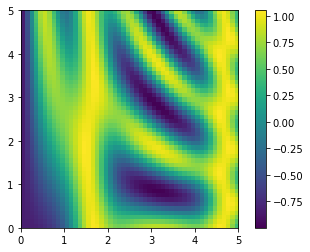

In [80]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

### Boolean Masking
This section covers the use of Boolean masks to examine and manipulate values within NumPy arrays. Examples of masking are when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion.

For example, if you want count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. 

In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

Instead of looping through the data, incrementing a counter each time we see values in some desired range we can use Ufuncs to do element-wise comparisons over arrays.


NumPy implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs. The result of these comparison operators is always an array with a Boolean data type. All six of the standard comparison operations are available:

In [81]:
x = np.array([1, 2, 3, 4, 5])

In [82]:
x < 3  # less than

array([ True,  True, False, False, False])

In [83]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [84]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [85]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [86]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [87]:
x == 3  # equal

array([False, False,  True, False, False])

The comparison operators are implemented as ufuncs in NumPy; for example, when you write x < 3, internally NumPy uses np.less(x, 3). 

In [88]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [91]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [92]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### Working with Boolean arrays:

There are a number of useful operations that canbe accomplished with boolean arrays.

One is counting the number of True entries in a Boolean array.

For this, np.count_nonzero is useful:

In [93]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

np.sum will generate a similar result.
It can also be used to generate row or column summations

In [94]:
np.sum(x<6)

8

In [95]:
np.sum(x<6, axis=1) # returns how many values meet the condition in each row

array([4, 2, 2])

In [96]:
np.sum(x<6, axis=0) # returns how many values meet the condition in each column

array([2, 2, 2, 2])

The any or all ufuncs can be applied 

In [97]:
np.any(x>8)

True

In [98]:
np.all(x<0)

False

np.any and np.all can be combined with axis specification to check conditions by row or by column

In [99]:
np.any(x>6, axis=0)

array([ True,  True,  True, False])

#### Boolean masking

In [100]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [101]:
x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

To select these values from the array, we can  index on this Boolean array; 

This is known as a masking operation:

In [102]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

This returns a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is True.


Boolean masking can be a useful way to threshold images

In [103]:
A = np.array([
[12, 13, 14, 12, 16, 14, 11, 10,  9],
[11, 14, 12, 15, 15, 16, 10, 12, 11],
[10, 12, 12, 15, 14, 16, 10, 12, 12],
[ 9, 11, 16, 15, 14, 16, 15, 12, 10],
[12, 11, 16, 14, 10, 12, 16, 12, 13],
[10, 15, 16, 14, 14, 14, 16, 15, 12],
[13, 17, 14, 10, 14, 11, 14, 15, 10],
[10, 16, 12, 14, 11, 12, 14, 18, 11],
[10, 19, 12, 14, 11, 12, 14, 18, 10],
[14, 22, 17, 19, 16, 17, 18, 17, 13],
[10, 16, 12, 14, 11, 12, 14, 18, 11],
[10, 16, 12, 14, 11, 12, 14, 18, 11],
[10, 19, 12, 14, 11, 12, 14, 18, 10],
[14, 22, 12, 14, 11, 12, 14, 17, 13],
[10, 16, 12, 14, 11, 12, 14, 18, 11]])

B = A < 15
B.astype(np.int)

array([[1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1]])

In [104]:
%matplotlib inline
plt.style.use('ggplot')

In [108]:
img=A

In [106]:
img = B

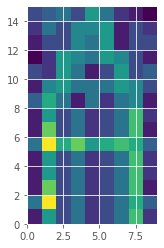

In [109]:
imgplot = plt.imshow(img, origin='upper', extent=[0,9,0,15], aspect='equal')

### Example application of Boolean arrays and Boolean logic

Preciptation data from Seattle Washington. 

### Questions we might want to ask:

How many rainy days were there in the year? 

What is the average precipitation on those rainy days? 

How many days were there with more than half an inch of rain?

In [110]:
url='https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv'

In [111]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
precip=pd.read_csv(url)


In [112]:
precip.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [113]:
precip.shape

(365, 17)

In [114]:
precip.dtypes

STATION         object
STATION_NAME    object
DATE             int64
PRCP             int64
SNWD             int64
SNOW             int64
TMAX             int64
TMIN             int64
AWND             int64
WDF2             int64
WDF5             int64
WSF2             int64
WSF5             int64
WT01             int64
WT05             int64
WT02             int64
WT03             int64
dtype: object

In [115]:
rainfall = precip['PRCP'].values

In [116]:
type(rainfall)

numpy.ndarray

In [117]:
len(rainfall)

365

The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.

In [118]:
inches=rainfall/254

In [119]:
np.sum(inches)

48.535433070866134

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

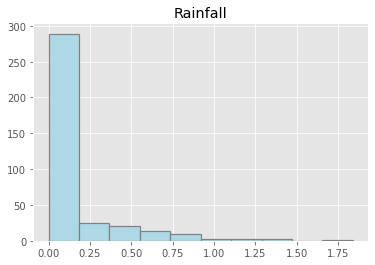

In [121]:
plt.hist(inches, color='lightblue',edgecolor='gray', linewidth=1.2)
plt.title("Rainfall")

plt.show()

In [122]:
inches >= 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [123]:
np.sum(inches>=1)

8

Comparison operators can be combined with Python's bitwise logic operators, &, |, ^, and ~. 

Similar to the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

    Operator	Equivalent ufunc   Operator	Equivalent ufunc
        &	     np.bitwise_and		|	    np.bitwise_or
        ^	     np.bitwise_xor		~	    np.bitwise_not

In [124]:
np.sum((inches > 0.5) & (inches < 1))

29

The parentheses here are important–because of operator precedence rules.

In [125]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


Now we can apply Boolean masking 

In [126]:
heavy_rain=(inches>=1)
inches[heavy_rain]

array([1.03937008, 1.83858268, 1.27165354, 1.09055118, 1.31102362,
       1.25984252, 1.        , 1.3503937 ])

In [127]:
rain_days=((inches > 0.5) & (inches < 1))
inches[rain_days]

array([0.83858268, 0.8503937 , 0.72047244, 0.66929134, 0.57086614,
       0.5984252 , 0.51181102, 0.7519685 , 0.6496063 , 0.74015748,
       0.87007874, 0.5511811 , 0.72834646, 0.53937008, 0.55905512,
       0.62992126, 0.53937008, 0.75984252, 0.8503937 , 0.72047244,
       0.7992126 , 0.59055118, 0.66929134, 0.5984252 , 0.72047244,
       0.51181102, 0.51181102, 0.77165354, 0.81102362])

In [128]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)
winter =(days<80) & (days > 295)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))

print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [129]:
summer_rain= ((inches > 0) & (summer))
inches[summer_rain]

#print("Number of on winter days in 2014 (inches): ",
     # np.count_nonzero(inches[rainy & winter]))

array([0.07086614, 0.09055118, 0.01181102, 0.75984252, 0.01968504,
       0.01968504, 0.5       , 0.8503937 , 0.03937008, 0.33070866,
       0.0511811 , 0.11811024, 0.01968504, 0.01181102])

In [132]:
summer_rain.head

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [133]:
inches[summer_rain]

array([0.07086614, 0.09055118, 0.01181102, 0.75984252, 0.01968504,
       0.01968504, 0.5       , 0.8503937 , 0.03937008, 0.33070866,
       0.0511811 , 0.11811024, 0.01968504, 0.01181102])

Fancy Indexing

In [134]:
C = np.array([123,188,190,99,77,88,100])
A = np.array([4,7,2,8,6,9,5])

R = C[A<=5]
print(R)

[123 190 100]
